In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Find URL of Input Data

In [2]:
data_name = "Labelled_Data.csv"
script_dir = Path().absolute().parent            # Get the current script's directory
data_path = script_dir / "Resources" / "Text" / data_name

Read Data

In [3]:
df = pd.read_csv(data_path)
df.head(100)

,frame_num,centroid_x1,centroid_y1,centroid_x2,centroid_y2,delta_x,y
0,2,451.0,427.0,481.0,425.0,30.0,426.00
1,2,493.5,467.5,529.0,466.0,35.5,466.75
2,2,639.0,494.0,675.0,491.0,36.0,492.50
3,2,570.0,535.0,630.0,532.0,60.0,533.50
4,2,837.5,536.5,895.5,532.5,58.0,534.50
...,...,...,...,...,...,...,...
95,216,493.0,421.0,523.0,419.0,30.0,420.00
96,216,736.5,583.5,791.5,581.5,55.0,582.50
97,216,639.5,785.5,756.5,782.5,117.0,784.00
98,228,529.5,434.5,563.5,433.5,34.0,434.00


In [4]:
print(df.shape)

(1600, 7)


Visualize Data

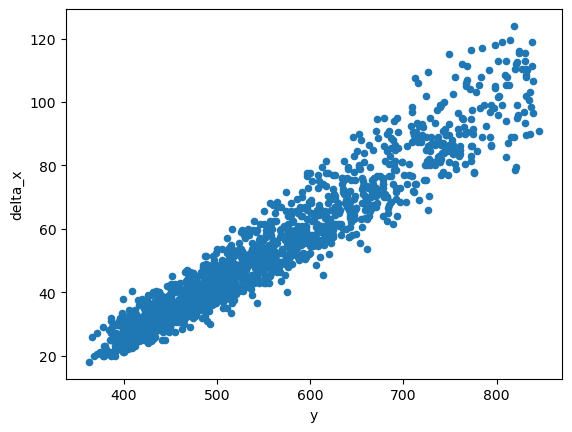

In [5]:
df.plot(kind = 'scatter', x = 'y', y = 'delta_x')
plt.show()

Remove Noises and Outliers

In [6]:
def f(x):
    return 13/80 * x - 5

In [7]:
index_to_drop = []
for index, row in df.iterrows():
    if row['delta_x'] > f(row['y']):
        print(index)
        index_to_drop.append(index)

In [8]:
df.drop(index_to_drop, inplace=True)
df.shape

(1600, 7)

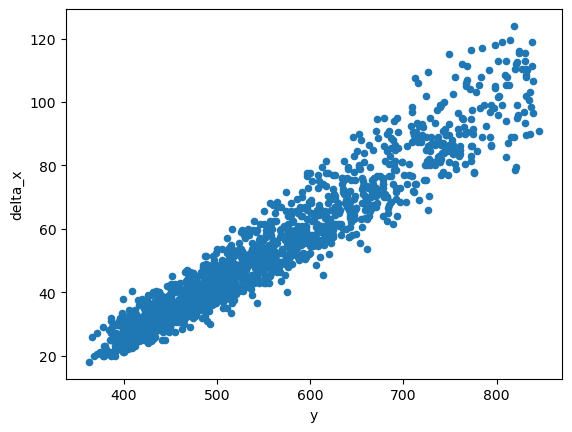

In [9]:
df.plot(kind = 'scatter', x = 'y', y = 'delta_x')
plt.show()

In [10]:
def f1(x):
    return 2/15 * x - 40 

index_to_drop = []
for index, row in df.iterrows():
    if row['delta_x'] < f1(row['y']):
        print(index)
        index_to_drop.append(index)

df.drop(index_to_drop, inplace=True)
df.shape

(1600, 7)

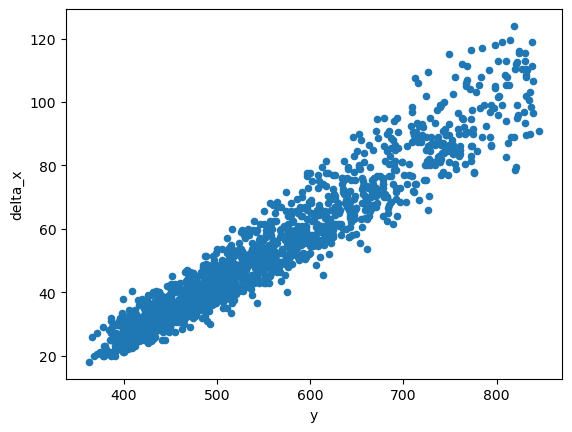

In [11]:
df.plot(kind = 'scatter', x = 'y', y = 'delta_x')
plt.show()

Save Final Result

In [12]:
destination_name = "Clean_Data.csv"
script_dir = Path().absolute().parent            # Get the current script's directory
destination_path = script_dir / "Resources" / "Text" / destination_name

df.to_csv(destination_path, index=False)